基于python脚本语言开发的数字图片处理包有 **PIL，Pillow，opencv，scikit-image**等，其中： 

- PIL和Pillow只提供最基础的数字图像处理，功能有限。

- PIL只支持 Python2, Pillow是PIL的一个派生分支，支持 Python3。

- opencv 实际上是一个c++库，只是提供了python接口，更新速度非常慢。

- scikit-image 是基于scipy的一款图像处理包，它将图片作为 numpy 数组进行处理，与matlab一样。


## 1. Load Image

In [5]:
from PIL import Image as img
import sys

# LOAD THE IMAGE
try:
    # Pillow allow use more than 30 formats
    huzhang = img.open("../img/虎杖.jpeg")

except IOError:
    print("Unable to load image")
    sys.exit(1)

# Use for debug.It will help to save image in a temporary file and displayed in an external program
# It may ImageMagic on Linux or Print on Windows 
huzhang.show()

## 2. Get Imformation
Pillow allow us to get some basic revelent imformation about Imge

In [6]:
from PIL import Image as img
%matplotlib inline
import sys

try:
    huzhnag = img.open("../img/虎杖.jpeg")
except IOError:
    print("Unable to load imge")
    sys.exit(1)

print("Format:{0}\nSize:{1}\nMode:{2}".format(
    huzhang.format,huzhang.size,huzhang.mode))
print(huzhang.filename)  
print(huzhang.info)

Format:JPEG
Size:(400, 519)
Mode:RGB
../img/虎杖.jpeg
{'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72)}


## 3. Operate Image

### 3.1. Format Image

变化前的大小(400, 519)
变化后的大小:(200, 259)


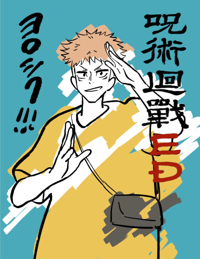

In [47]:
%matplotlib inline
w,h=huzhang.size
print("变化前的大小{0}".format(huzhang.size))
huzhang.thumbnail((w/2,h/2))
print('变化后的大小:{0}'.format(huzhang.size))
display(huzhang)

### 3.2. Crop Image

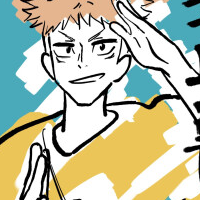

In [32]:
split_huzhang = Image.open('../img/虎杖.jpeg')
box = (100,100,300,300)
region = split_huzhang.crop(box)
display(region)

### 3.3. Resize Image

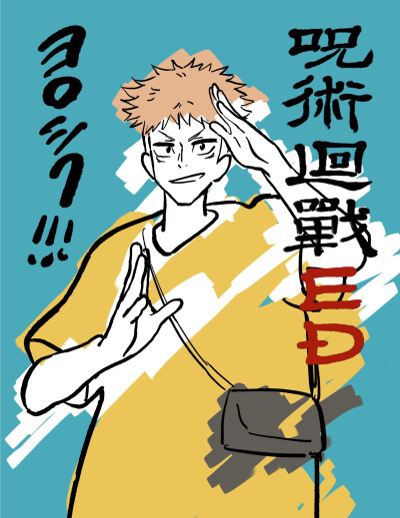

In [7]:
display(huzhang.resize((400,518)))

### 3.4. Rotating Picture

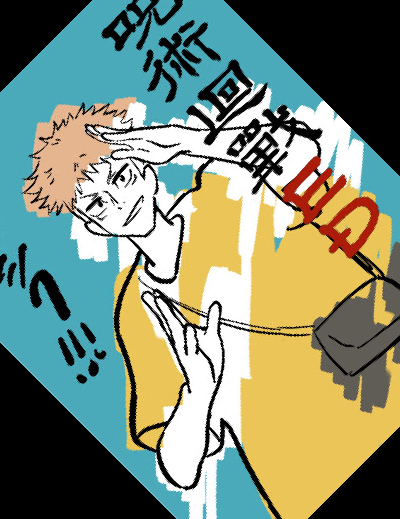

In [53]:
# Anticlockwise rotate 45°
out1 = huzhnag.rotate(45)
display(out1)

### 3.5. Transpose Image

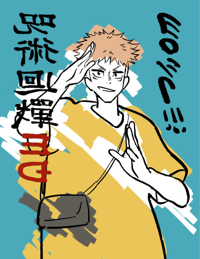

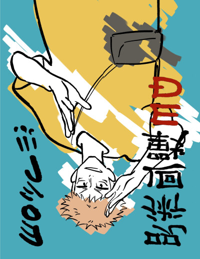

In [55]:
out2 =  huzhang.transpose(Image.FLIP_LEFT_RIGHT)
display(out2)
out3 = huzhang.transpose(Image.FLIP_TOP_BOTTOM)
display(out3)

## 4. Color Operation

## 4.1. Gery Scale 
    

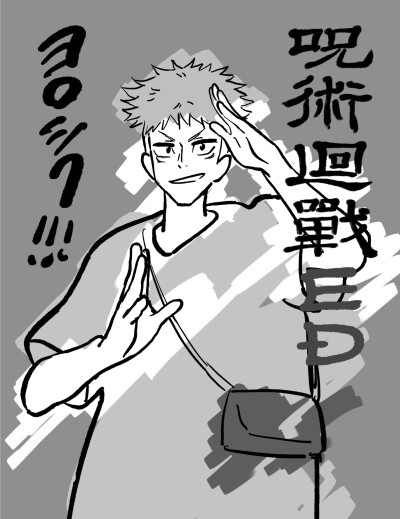

In [56]:
img = Image.open('../img/虎杖.jpeg')
img_grey = img.convert('L')
display(img_grey)

## 4.2 Enhance Image

Here we need to import ImageEnhance

When we enhance image, remember to **create a instance**,then use "enhance()" function 

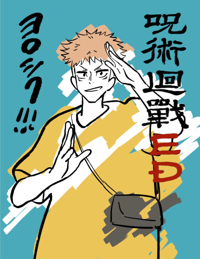

In [59]:
from PIL import Image,ImageEnhance

display(huzhang)


### 4.2.1. Enhance Color

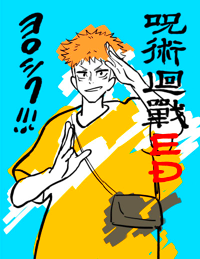

In [79]:
# create the instance of ImageEnhance
col = ImageEnhance.Color(huzhang)
col = col.enhance(3)

display(col)


### 4.2.2. Enhance Contrast

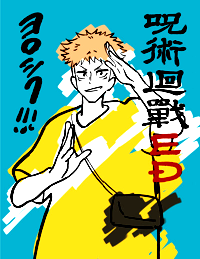

In [78]:
contrast = ImageEnhance.Contrast(huzhang)
contrast = contrast.enhance(2) 
display(contrast)

### 4.2.3. Enhance Brightness

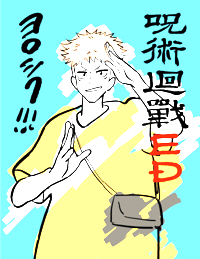

In [77]:
brightness = ImageEnhance.Brightness(huzhang).enhance(1.8)
display(brightness)

### 4.2.4. Enhance Sharpness

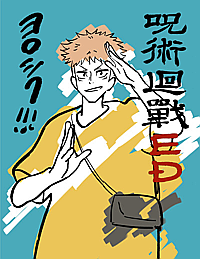

In [80]:
sharpness = ImageEnhance.Sharpness(huzhang).enhance(3)
display(sharpness)

## 4.3. Filter on Image

### 4.3.1. BoxBulr

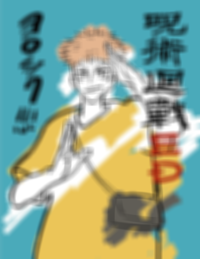

In [82]:
from PIL import Image,ImageFilter
# param float 1-9 
blur = huzhang.filter(ImageFilter.BoxBlur(3))
display(blur)

### 4.3.2. GaussianBlur

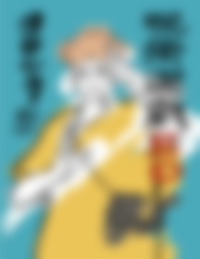

In [85]:
gaussian = huzhang.filter(ImageFilter.GaussianBlur(5))
display(gaussian)

### 4.3.3. Contour


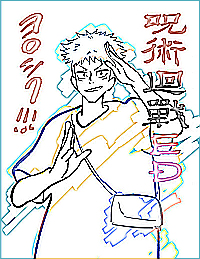

In [86]:
contour = huzhang.filter(ImageFilter.CONTOUR)
display(contour)

### 4.3.4. MedianFilter


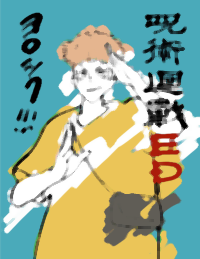

In [87]:
median = huzhang.filter(ImageFilter.MedianFilter(5))
display(median)

## 4.4. ImageOps

this module capsulated image processing operation. The module is experimental,and most operator can only handle L and RGB images


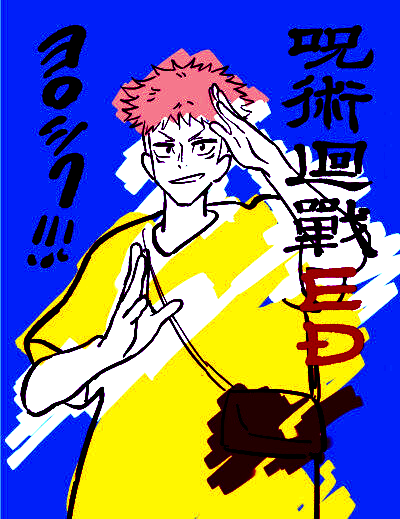

In [14]:
from PIL import Image,ImageOps
%matplotlib inline
# set the maximum of contrast
im = ImageOps.autocontrast(huzhnag ,20)

display(im)

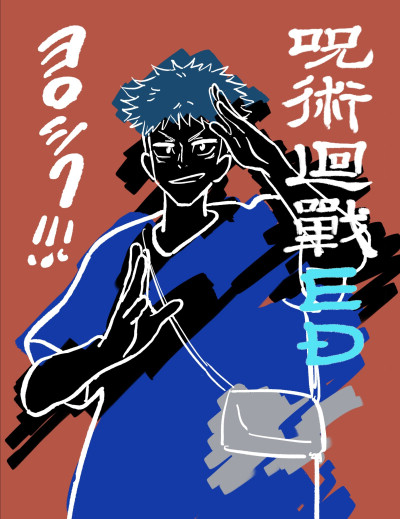

In [16]:
im = ImageOps.invert(huzhang)
display(im)

## 5 绘图

Use the "new" instance of Image module to create a blank Image,RGB color channel ,320*240 .Red Background

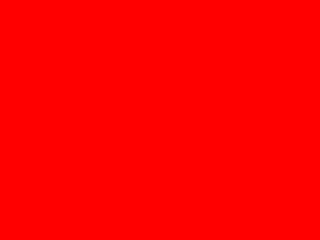

In [17]:
from PIL import Image, ImageDraw,ImageFont,ImageFilter
blank = Image.new("RGB",[320,240],"red")
display(blank)

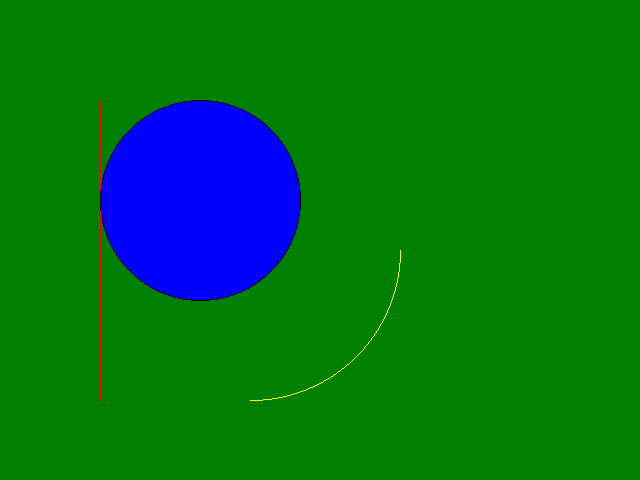

In [20]:
# draw on the created canvas
blank = Image.new("RGB",[640,480],"green")
drawObj = ImageDraw.Draw(blank)
drawObj.line([100,100,100,400],fill='red')
drawObj.arc([100,100,400,400],0,90,fill='yellow')
drawObj.ellipse([100,100,300,300],outline='black',fill='blue')
display(blank)

## 6.Generate Verification Code 

## 

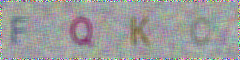

In [29]:
import random
from PIL import Image,ImageDraw,ImageFont,ImageFilter

# random character
def randChar():
    return chr(random.randint(65,90))

def rndColor():
    return (
        random.randint(64,255),
        random.randint(64,255),
        random.randint(64,255),
    )

def rndColor2():
    return (
        random.randint(32,127),
        random.randint(32,127),
        random.randint(32,127),
    )

width = 60*4
height = 60


image = Image.new('RGB',(width,height),(255,255,255))

# create Font instance
font = ImageFont.truetype(font = "pillow_data/ARIALN.TTF",size = 36)

# create Draw instance
draw = ImageDraw.Draw(image)

for x in range(width):
    for y in range(height):
        draw.point((x,y),fill=rndColor())

# output character
for t in range(4):   
        draw.text((60*t+10,10),randChar(),font = font,fill = rndColor2())


image = image.filter(ImageFilter.BLUR)

display(image)